##### Generating figures for the report
-----

In [ ]:
import json
import matplotlib.pyplot as plt
import os

os.makedirs("Figures", exist_ok=True)

In [2]:
arc = "gru"
# genre = "Pop"
with open(f"Weights/{arc}_embed_freeze/logs.json") as f:
# with open(f"Weights/genre_specific/lstm/{genre}/logs.json") as f:
    log = json.load(f)

In [3]:
log.keys()

dict_keys(['loss_track', 'perplexity_track'])

In [4]:
loss = log["loss_track"]
preplexity = log["perplexity_track"]

In [5]:
plt.rcdefaults()
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc("font", size=BIGGER_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
# plt.rc("legend", fontsize=BIGGER_SIZE)  # legend fontsize
# plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

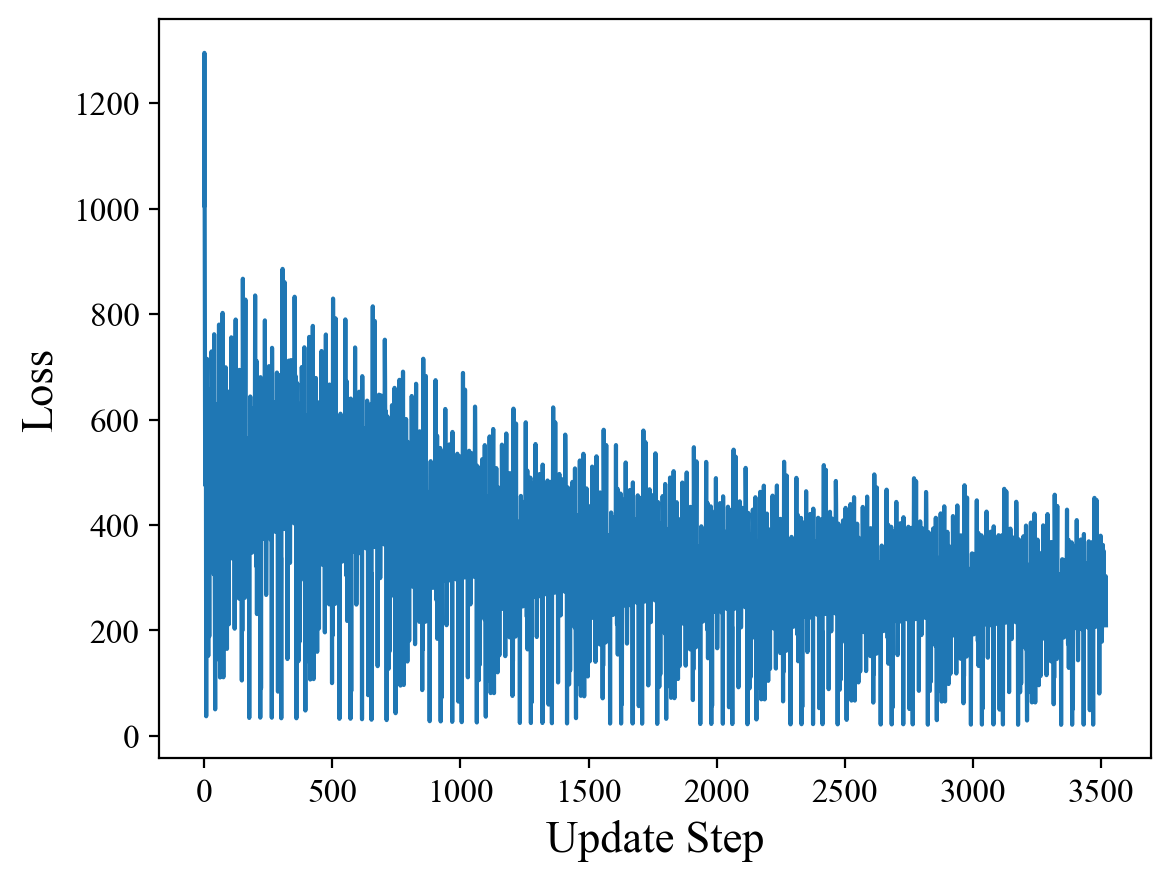

In [6]:
plt.plot(loss)
plt.ylabel("Loss")
plt.xlabel("Update Step")
plt.savefig(f"Figures/{arc}_loss.pdf", dpi = 300, format = "pdf")
# plt.savefig(f"Figures/genre_specific/{genre}_loss.pdf", dpi = 300, format = "pdf")


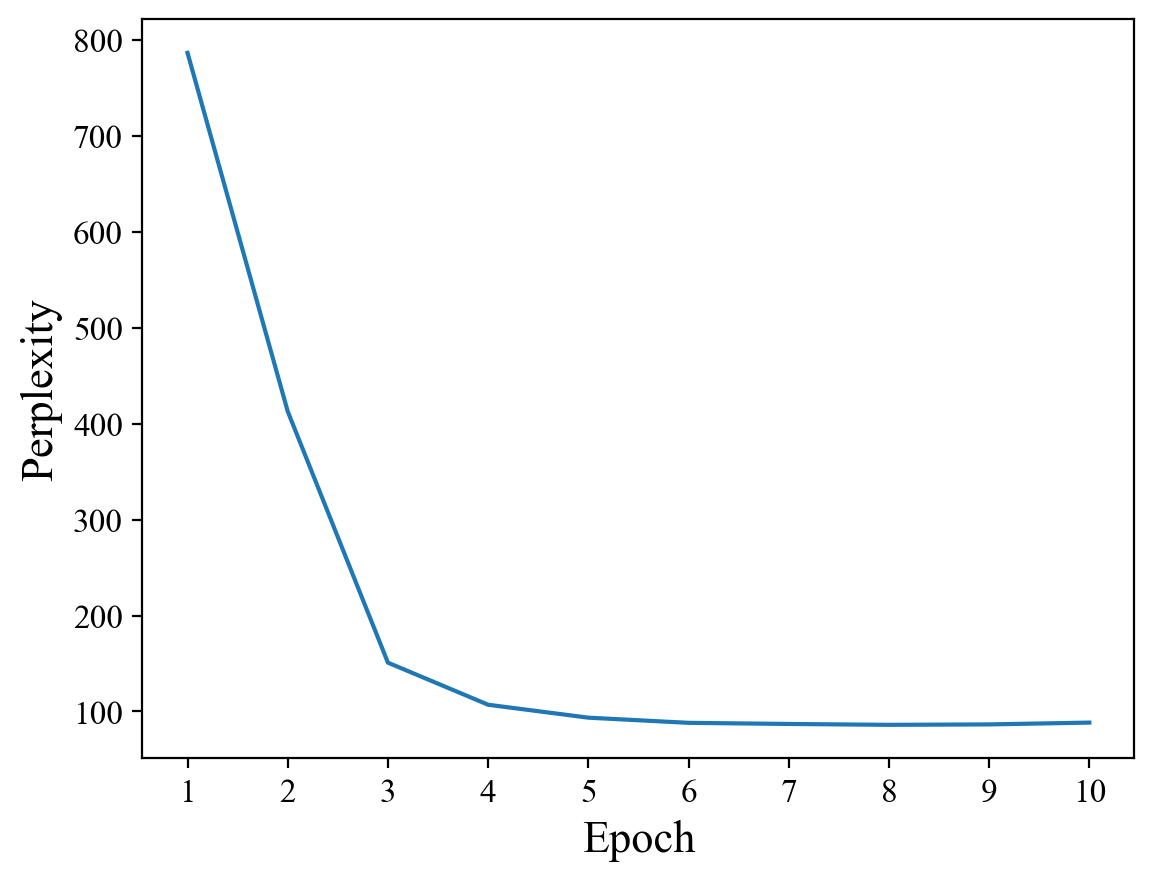

In [7]:
plt.plot(preplexity[1:])
plt.ylabel("Perplexity")
plt.xlabel("Epoch")
plt.xticks(range(0, 10), labels = range(1, 11))
plt.savefig(f"Figures/{arc}_perplexity.pdf", dpi = 300, format = "pdf")
# plt.savefig(f"Figures/genre_specific/{genre}_perplexity.pdf", dpi = 300, format = "pdf")


In [3]:
# arc = "gru"
import json
import matplotlib.pyplot as plt

genre_specific = {}
all_genres = ["Rock", "Pop", "Rap", "Country"]
for genre in all_genres:
    with open(f"Weights/genre_specific/lstm/{genre}/logs.json") as f:
        genre_specific[genre] = json.load(f)

In [11]:
plt.rcdefaults()
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc("font", size=BIGGER_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
# plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

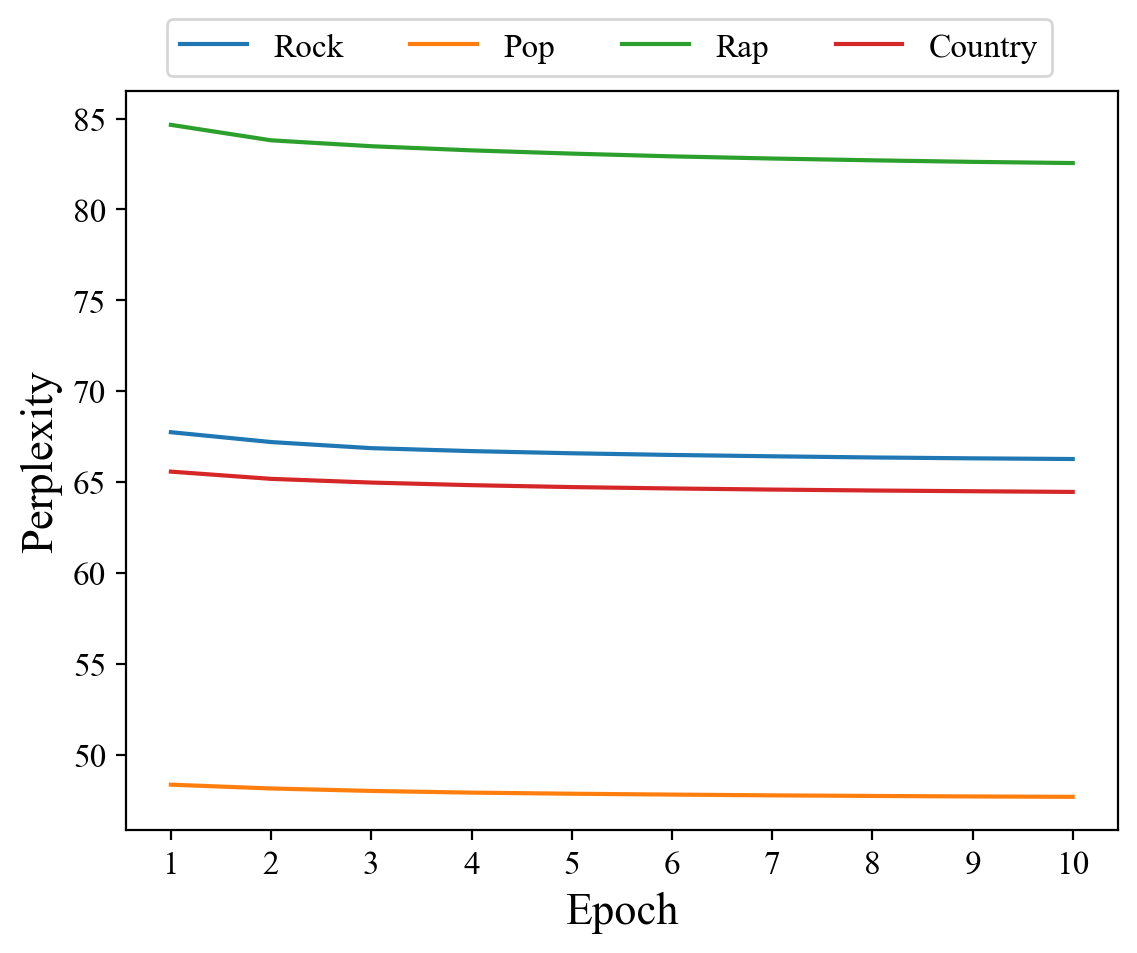

In [29]:
for genre in all_genres:
    perplexity = genre_specific[genre]["perplexity_track"]
    plt.plot(perplexity[1:], label = genre)
plt.ylabel("Perplexity")
plt.xlabel("Epoch")
plt.xticks(range(0, 10), labels = range(1, 11))
plt.legend(ncol = 4, bbox_to_anchor=(.95, 1.12))
plt.savefig(f"Figures/genre_specific/all_perplexity.pdf", dpi = 300, format = "pdf")